In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '4'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
model_names

['mdl=SerialRNN~input_dims=1~dummy_seft=1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~cell=GRU~b=203~pb=.~hr=0~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1',
 'mdl=ParallelRNN~input_dims=1~dummy_seft=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=203~pb=.~hr=0~bypass_synth=1~bypass_prob=1.0~ds_prob=0.0',
 'mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~hr=0~bypass_synth=1~bypass_prob=1.0~ds_prob=0.0',
 'mdl=SerialRNN~input_dims=1~dummy_seft=1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~cell=LSTM~b=203~pb=.~hr=0~bypass_synth=0~bypass_prob=0.0~ds_prob=0.5',
 'mdl=ParallelRNN~input_dims=1~dummy_seft=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=203~pb=.~hr=0~bypass_synth=0~bypass_prob=0.0~ds_prob=0.5',
 'mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['id=1000c0', 'id=1000c1', 'id=1001c0', 'id=1001c1', 'id=1002c0', 'id=1002c1', 'id=1003c0', 'id=1003c1', 'id=1004c0', 'id=1004c1', 'id=1005c0', 'id=1005c1'](12#); mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~hr=0~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1


,c,obj_y_pred_c,obj_y_pred_p
ZTF20aayprqz,SLSN,SNIa,0.984326
ZTF20aaoxbju,SNII*,SNIbc,0.426356
ZTF20abeohfn,SNII*,SNIa,0.829501
ZTF18acrhehl,SNII*,SNIa,0.692973
ZTF18acuqskr,SNII*,SNIa,0.689615
...,...,...,...
ZTF20aavgmli,SNIbc,SNIa,0.782158
ZTF20aaiftgi,SNIbc,SNIa,0.664680
ZTF19aapwnmb,SNIbc,SNIa,0.788522
ZTF19acftclq,SNIbc,SNII*,0.636262


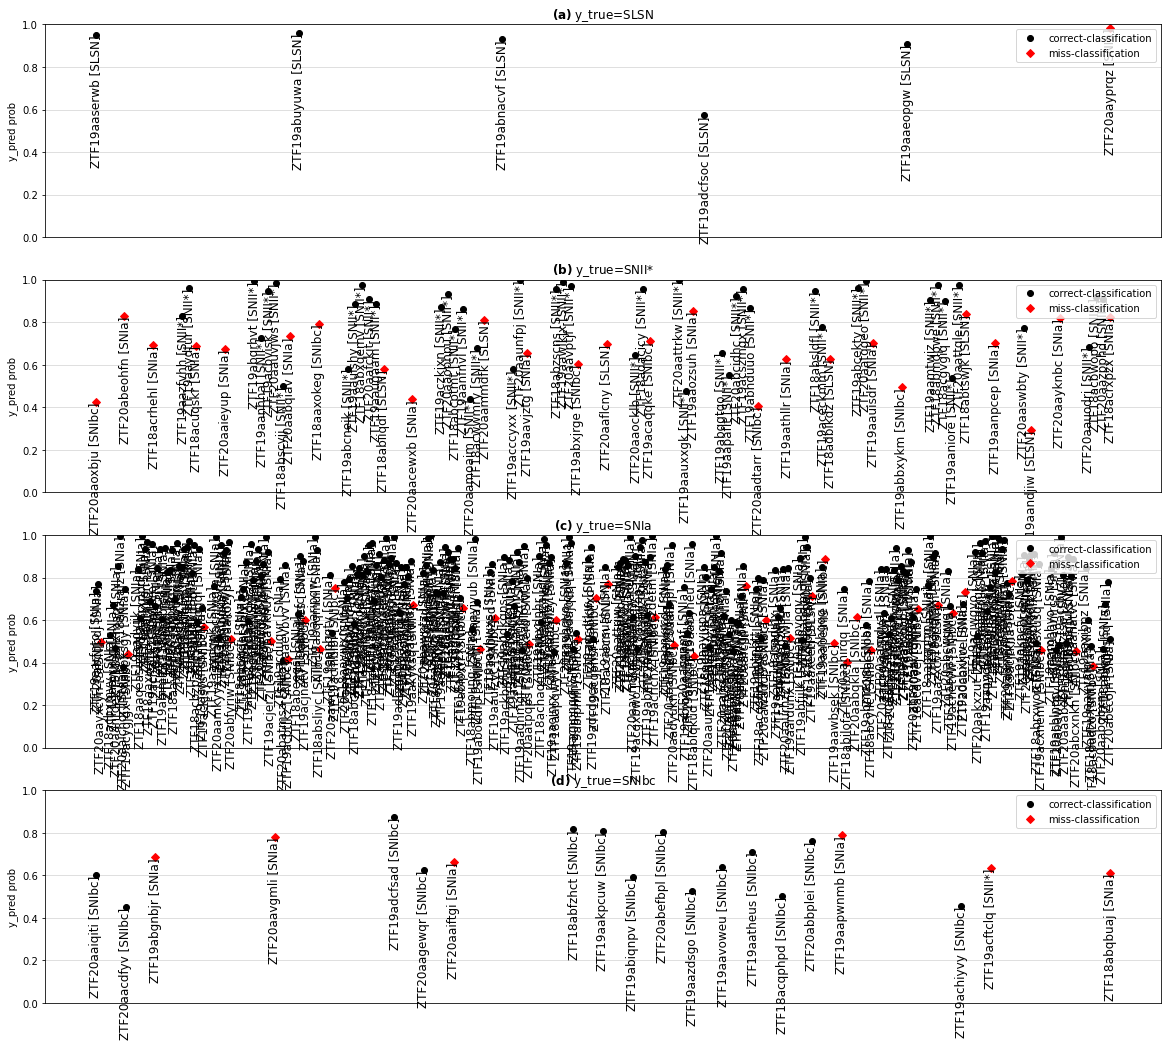

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import fuzzytools.files as ftfiles
from fuzzytools.datascience import misclassifications
import matplotlib.pyplot as plt

model_name = 'mdl=ParallelTimeModAttn~input_dims=1~dummy_seft=1~m=24~kernel_size=1~heads=4~time_noise_window=6*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=203~pb=.~hr=0~bypass_synth=0~bypass_prob=0.0~ds_prob=0.1'
rootdir = '../save'
train_mode = 'fine-tuning'
load_roodir = f'{rootdir}/{model_name}/{train_mode}/performance/{cfilename}'
files, files_ids, kfs = ftfiles.gather_files_by_kfold(load_roodir, kf, lcset_name,
    fext='d',
    imbalanced_kf_mode='ignore', # error oversampling
    )
print(f'{files_ids}({len(files_ids)}#); {model_name}')

file_idx = 0
file = files[file_idx]
thdays = file()['thdays']
thday = thdays[-1]
thdays_predictions = file()['thdays_predictions'][thday]
y_pred_p = thdays_predictions['y_pred_p']
y_true = thdays_predictions['y_true']
class_names = file()['class_names']
obj_ids = file()['lcobj_names']

fig, axs, miss_objs_df = misclassifications.plot_misclassification_map(y_pred_p, y_true, class_names,
    obj_ids=obj_ids,
    #pred_prob_th=.8, # None .5
    fontsize=12,
    figsize=(20,18),
    legend_loc='upper right',
    #verbose=1,
    also_show_correct_objs_txt=True,
    )
display(miss_objs_df)
plt.show()

In [4]:
txt = ''
for miss_obj_id in miss_objs_df.index:
    txt += f"'{miss_obj_id}', "
print(f'deep_miss_obj_ids = [{txt}]')

deep_miss_obj_ids = ['ZTF20aayprqz', 'ZTF20aaoxbju', 'ZTF20abeohfn', 'ZTF18acrhehl', 'ZTF18acuqskr', 'ZTF20aaieyup', 'ZTF20aabqiav', 'ZTF18aaxokeg', 'ZTF18abiiqdl', 'ZTF20aacewxb', 'ZTF20aammdfk', 'ZTF19aavjztg', 'ZTF19abxjrge', 'ZTF20aaflcny', 'ZTF19acaqqke', 'ZTF19aaozsuh', 'ZTF20aadtarr', 'ZTF19aathllr', 'ZTF18adbikdz', 'ZTF19aauisdr', 'ZTF19abbxykm', 'ZTF18abtswjk', 'ZTF19aanpcep', 'ZTF19aandjiw', 'ZTF20aayknbc', 'ZTF18acrxpzx', 'ZTF20aayxcyn', 'ZTF19acygjgx', 'ZTF19ackjsys', 'ZTF20abfyriw', 'ZTF19acjerzj', 'ZTF19acbtlkz', 'ZTF19acjnatv', 'ZTF18absliyc', 'ZTF19acmblbi', 'ZTF19aakyxsq', 'ZTF19ablpxtf', 'ZTF19aboudfp', 'ZTF19aaulzvc', 'ZTF20aatpqps', 'ZTF18aapqwyv', 'ZTF19abipmfl', 'ZTF19acgphsf', 'ZTF18accjecm', 'ZTF19acrichx', 'ZTF20aadyukn', 'ZTF18ablqkud', 'ZTF20aafcjln', 'ZTF20aawadcp', 'ZTF19aardunx', 'ZTF19aaxeetj', 'ZTF19aapeime', 'ZTF19aawbsek', 'ZTF18abilofa', 'ZTF20aabqkla', 'ZTF18abcyilc', 'ZTF18acdvvej', 'ZTF19aazxcvl', 'ZTF19achetvw', 'ZTF20aaivjce', 'ZTF19acjtkha', 'ZT